In [1166]:
import os
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [1168]:
cd = [x for x in os.listdir("data") if "cd_" in x]
df = pd.DataFrame()
for c in cd:
    df = pd.concat([df, pd.read_parquet(os.path.join("data",c))])

In [1170]:
df.shape

(153169, 18)

In [1172]:
df.sample(100).sort_values(by="oscrapovano")

,prodejce,vlaky,obsazenost,zpozdeni,oscrapovano,odkud,kam,jizdni_doba,cena_poznamka,den,odjezd,predstih,prestupy,prostredek,cena,mistenka_zdarma,vzdalenost,nahradni_bus
1229,ČD,"[IC 576 Metropol, EC 176 Berliner, ICE 1600]",[Předpokládané střední obsazení - doporučujeme...,"[0, 0, 0]",2024-10-31 23:46:17,Brno hl.n.,Hamburg Hbf,631,None,čtvrtek,2024-11-07 05:39:00,6 days 05:52:43,2,vlak,1562.0,None,NaN,None
548,ČD,"[EN 97443 Slovakia /EN 406, IC 83172 PRZEMYSLA...","[Téměr vyprodaná místa k sezení, Téměr vyproda...","[0, 0]",2024-11-01 00:36:31,Olomouc hl.n.,Przemysl Gl.,599,None,sobota,2024-11-02 23:45:00,1 days 23:08:29,1,vlak,1058.0,None,NaN,None
3364,ČD,"[EC 280 Metropolitan, EC 378 Berliner, ICE 506]",[Předpokládané střední obsazení - doporučujeme...,"[0, 0, 0]",2024-11-01 08:45:57,Brno hl.n.,Hamburg Hbf,632,None,čtvrtek,2024-11-07 09:39:00,6 days 00:53:03,2,vlak,1471.0,None,NaN,None
4087,ČD,[R 662 Rožmberk],[Předpokládané nízké obsazení],[0],2024-11-01 08:56:24,České Budějovice,Plzeň hl.n.,112,None,pátek,2024-11-08 18:04:00,7 days 09:07:36,0,vlak,249.0,True,136.0,True
4098,ČD,[Sp 1930 VELTLÍNSKÉ ZELENÉ],[Téměr vyprodaná místa k sezení],[0],2024-11-01 08:56:57,Znojmo,Jihlava,91,None,úterý,2024-11-12 04:53:00,10 days 19:56:03,0,vlak,169.0,None,99.0,None
4898,ČD,"[TL 6616/, Sp 1977, R 671 Labe, EC 331 Jižní e...",[Předpokládané střední obsazení - doporučujeme...,"[0, 0, 0, 0, 0]",2024-11-01 10:35:45,Liberec,Salzburg Hbf,887,None,neděle,2024-11-03 21:02:00,2 days 10:26:15,4,vlak,961.0,None,NaN,None
8832,ČD,[SC 507 Pendolino],[Předpokládané vysoké obsazení - doporučujeme ...,[0],2024-11-01 12:56:25,Praha hl.n.,Ostrava hl.n.,192,None,pátek,2024-11-08 13:32:00,7 days 00:35:35,0,vlak,709.0,None,356.0,None
12511,ČD,"[R 1065/, R 1143/, rj 257 Vindobona, rjx 168 O...",[Předpokládané střední obsazení - doporučujeme...,"[0, 0, 0, 0]",2024-11-01 16:42:49,Liberec,Salzburg Hbf,588,None,středa,2024-11-06 08:05:00,4 days 15:22:11,3,vlak,2113.0,None,NaN,None
14699,ČD,[rj 71 Vindobona],[Předpokládané nízké obsazení],[0],2024-11-01 18:40:25,Praha hl.n.,Brno hl.n.,157,None,úterý,2024-11-05 04:42:00,3 days 10:01:35,0,vlak,269.0,True,255.0,None
15074,ČD,"[R 700 Vltava, Os 19928, R 748 Berounka]","[Předpokládané nízké obsazení, Předpokládané n...","[0, 0, 0]",2024-11-01 18:45:35,Praha-Smíchov,Plzeň hl.n.,310,None,středa,2024-11-06 22:46:00,5 days 04:00:25,2,vlak,364.0,True,262.0,True


In [1174]:
df['predstih_d'] = df['predstih'].dt.days
df['predstih_h'] = df['predstih'].dt.total_seconds() / 3600

<Axes: xlabel='predstih_d'>

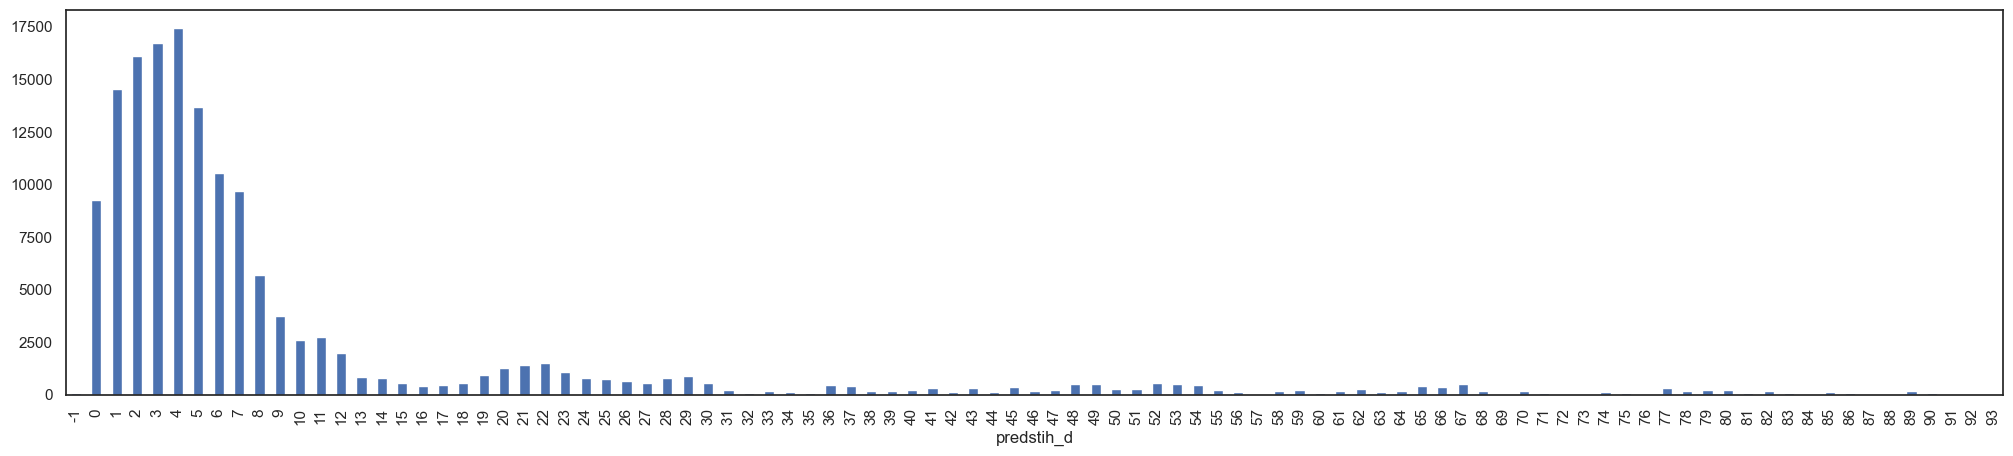

In [1176]:
df.groupby("predstih_d").size().plot.bar(figsize=(25,5))

<Axes: xlabel='predstih_d'>

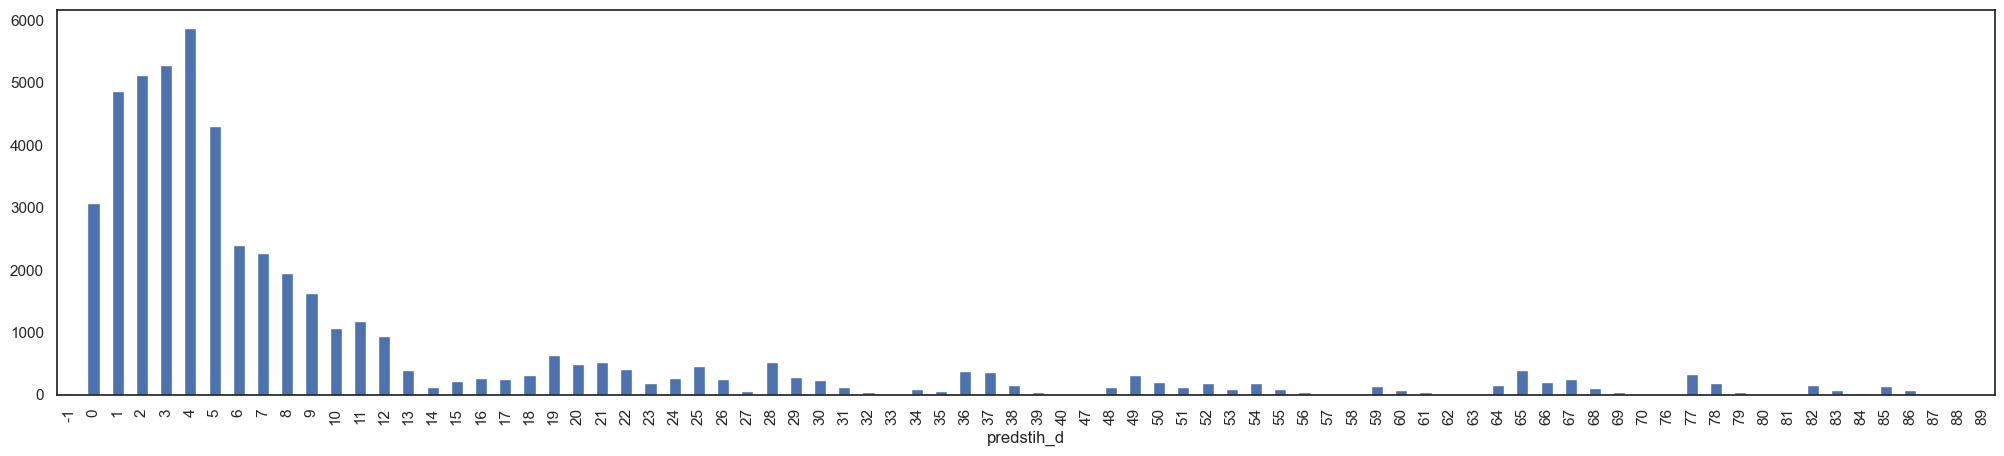

In [1178]:
df[df['oscrapovano'] >= '2024-11-05'].groupby("predstih_d").size().plot.bar(figsize=(25,5))

In [1123]:
df.groupby("cena_poznamka").size()

cena_poznamka
Cena v dalším kroku     3963
Zjistit cenu           26804
dtype: int64

In [1182]:
df[df['oscrapovano'] >= '2024-11-05'].groupby(['odkud','kam']).size().nlargest(50)

odkud                 kam                      
Praha hl.n.           Brno hl.n.                   5372
Brno hl.n.            Praha hl.n.                  5249
Karlovy Vary          Ostrava hl.n.                3605
Pardubice hl.n.       Košice                       2795
Brno hl.n.            Hamburg Hbf                  2217
Ústí n.L.hl.n.        Dresden Hbf                  2205
Slavonice             Plzeň hl.n.                  2026
Ostrava hl.n.         Gdansk Glowny                1887
Praha hl.n.           Bratislava hl.st.            1875
Olomouc hl.n.         Przemysl Gl.                 1848
Praha hl.n.           Bruxelles-Midi               1827
Plzeň hl.n.           Ostrava hl.n.                1655
Praha hl.n.           Warszawa Centralna           1455
Brno hl.n.            Ljubljana                    1430
Praha hl.n.           Zagreb Glavni kolodvor       1342
                      Berlin Hbf (tief)            1314
                      Wien Hbf                     1151


In [1162]:
df[df['cena'] > 0].dropna(subset="cena").sort_values(by="cena",ascending=False).drop_duplicates(subset=['odkud','kam']).head(10)

,prodejce,vlaky,obsazenost,zpozdeni,oscrapovano,odkud,kam,jizdni_doba,cena_poznamka,den,odjezd,predstih,cena,mistenka_zdarma,vzdalenost,autobus,predstih_d,predstih_h,prestupy
4468,ČD,"[EC 378 Berliner, ICE 273, IC 60402]",[Předpokládané střední obsazení - doporučujeme...,"[0, 0, 0]",2024-11-03 06:49:05,Praha hl.n.,Amsterdam Centraal,1290,None,středa,2024-11-06 12:28:00,3 days 05:38:55,11644.0,None,NaN,None,3,77.648611,2
19925,ČD,"[EC 273 Metropolitan, EC 101 Moravia, ICE 92 B...","[Předpokládané nízké obsazení, Předpokládané n...","[0, 0, 0]",2024-11-04 17:40:14,Brno hl.n.,Hamburg Hbf,689,None,pátek,2025-01-24 08:22:00,80 days 14:41:46,9814.0,None,NaN,None,80,1934.696111,2
5717,ČD,"[rj 256 Vindobona, ICE 700, R 81603, IC 242]",[Předpokládané vysoké obsazení - doporučujeme ...,"[0, 0, 0, 0]",2024-11-04 07:27:27,Berlin Hbf (tief),Amsterdam Centraal,988,None,sobota,2024-12-14 22:29:00,40 days 15:01:33,8488.0,None,NaN,None,40,975.025833,3
11871,ČD,"[EC 378 Berliner, ICE 554, RE 26834 RRX Rhein-...",[Předpokládané střední obsazení - doporučujeme...,"[0, 0, 0, 0, 0]",2024-11-05 13:11:57,Berlin Hbf,Bruxelles-Midi,1052,None,čtvrtek,2024-11-07 16:56:00,2 days 03:44:03,7412.0,None,NaN,None,2,51.734167,4
11189,ČD,"[IC 564 Západní expres, Sp 5284, RE 3406, ICE ...",[Předpokládané střední obsazení - doporučujeme...,"[0, 0, 0, 0, 0]",2024-11-05 11:55:47,Praha hl.n.,Bruxelles-Midi,672,None,neděle,2024-11-17 08:23:00,11 days 20:27:13,7322.0,None,NaN,None,11,284.453611,4
13813,ČD,"[EC 172 Hungaria, ICE 552, ICE 1204 Karwendel]",[Předpokládané střední obsazení - doporučujeme...,"[0, 0, 0]",2024-11-01 17:03:47,Berlin Hbf,Hamburg Hbf,650,None,úterý,2024-11-19 18:56:00,18 days 01:52:13,7018.0,None,NaN,None,18,433.870278,2
198,ČD,"[rj 256 Vindobona, ICE 502]",[Téměr vyprodaná místa k sezení],"[0, 0]",2024-11-01 00:32:19,Berlin Hbf (tief),Hamburg Hbf,778,None,pátek,2024-11-01 23:26:00,0 days 22:53:41,7018.0,None,NaN,None,0,22.894722,1
12656,ČD,"[EC 362 Bavorský expres, ICE 518, ICE 107, IC ...","[Předpokládané nízké obsazení, Předpokládané n...","[0, 0, 0, 0]",2024-11-05 13:21:36,Praha hl.n.,Bern,753,None,neděle,2024-11-10 05:23:00,4 days 16:01:24,6894.0,None,NaN,None,4,112.023333,3
17351,ČD,"[EC 172 Hungaria, ICE 842, RB 10301 Rhein-Nier...","[Téměr vyprodaná místa k sezení, Téměr vyproda...","[0, 0, 0, 0, 0]",2024-11-03 15:49:25,Berlin Hbf,Amsterdam Zuid,1051,None,čtvrtek,2025-01-23 19:46:00,81 days 03:56:35,6852.0,None,NaN,None,81,1947.943056,4
6378,ČD,"[IC 532 Jižní expres, EC 458 Canopus, IC 333, ...",[Předpokládané vysoké obsazení - doporučujeme ...,"[0, 0, 0, 0]",2024-11-03 09:17:24,České Budějovice,Zürich HB,1016,None,neděle,2024-11-03 15:58:00,0 days 06:40:36,6827.0,None,NaN,None,0,6.676667,3


<Axes: xlabel='zpozdeni'>

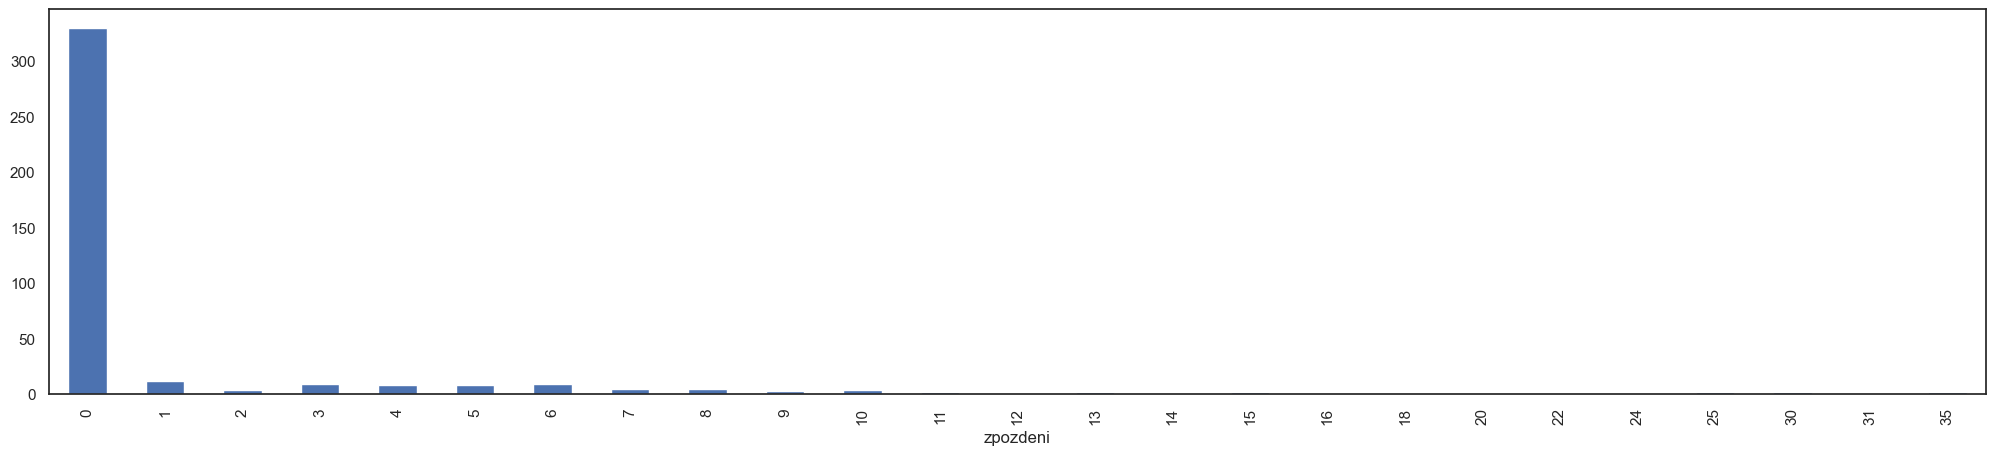

In [1125]:
df[df['predstih_h'] < 0.5].explode('zpozdeni').groupby('zpozdeni').size().plot.bar(figsize=(25,5))

<Axes: xlabel='prestupy'>

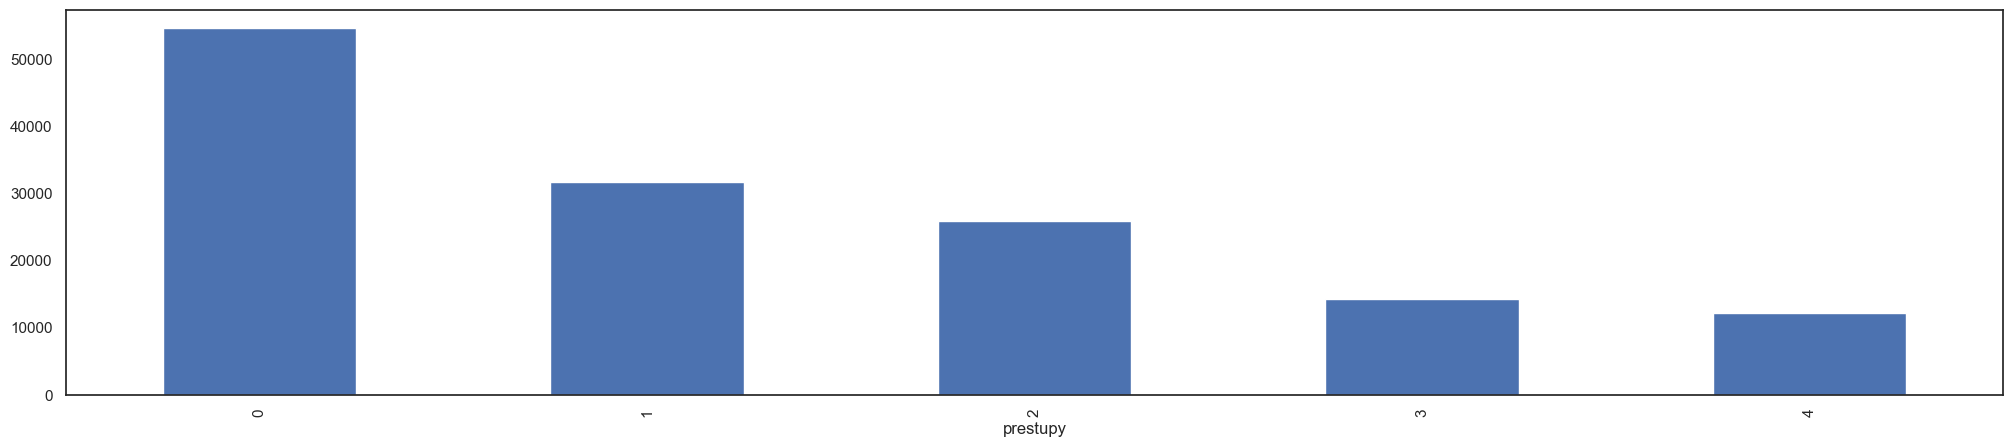

In [1126]:
df.groupby("prestupy").size().plot.bar(figsize=(25,5))

In [1127]:
df.sort_values('jizdni_doba',ascending=False).head(5)

,prodejce,vlaky,obsazenost,zpozdeni,oscrapovano,odkud,kam,jizdni_doba,cena_poznamka,den,odjezd,predstih,cena,mistenka_zdarma,vzdalenost,autobus,predstih_d,predstih_h,prestupy
21179,ČD,"[Os 9850, Os 19802, R 618 Krušnohor, rj 257 Vi...",[Předpokládané vysoké obsazení - doporučujeme ...,"[0, 0, 0, 0, 0]",2024-11-04 19:15:27,Praha-Dejvice,Ljubljana,1446,None,sobota,2024-11-09 00:57:00,4 days 05:41:33,1834.0,None,NaN,None,4,101.692500,4
21160,ČD,"[Os 9850, Os 19802, R 618 Krušnohor, rj 257 Vi...",[Předpokládané vysoké obsazení - doporučujeme ...,"[0, 0, 0, 0, 0]",2024-11-04 19:15:27,Praha-Dejvice,Ljubljana,1446,Zjistit cenu,neděle,2024-11-10 00:57:00,5 days 05:41:33,1834.0,None,NaN,None,5,125.692500,4
21835,ČD,"[Os 9850, Os 19800, R 618 Krušnohor, rj 257 Vi...",[Předpokládané střední obsazení - doporučujeme...,"[0, 0, 0, 0, 0]",2024-11-04 19:23:34,Praha-Dejvice,Ljubljana,1446,None,středa,2024-11-13 00:57:00,8 days 05:33:26,1800.0,None,NaN,None,8,197.557222,4
22087,ČD,"[Os 9850, Os 19800, R 618 Krušnohor, rj 257 Vi...",[Předpokládané vysoké obsazení - doporučujeme ...,"[0, 0, 0, 0, 0]",2024-11-04 19:28:00,Praha-Dejvice,Ljubljana,1446,None,pátek,2024-11-15 00:57:00,10 days 05:29:00,1834.0,None,NaN,None,10,245.483333,4
22429,ČD,"[Os 9850, Os 19800, R 618 Krušnohor, rj 257 Vi...",[Předpokládané střední obsazení - doporučujeme...,"[0, 0, 0, 0, 0]",2024-11-04 19:32:35,Praha-Dejvice,Ljubljana,1446,None,středa,2024-11-27 00:57:00,22 days 05:24:25,1800.0,None,NaN,None,22,533.406944,4


In [1128]:
import numpy as np

In [1129]:
# df[(df['odkud'] == 'Brno hl.n.') & (df['kam'] == 'Praha hl.n.') & (df['jizdni_doba'] < 155)].groupby(np.ceil(df['predstih_h']))['cena'].median().head(24)

In [1130]:
df[(df['odkud'] == 'Brno hl.n.') & (df['kam'] == 'Praha hl.n.') & (df['jizdni_doba'] < 160)].groupby('predstih_d')['cena'].median()

predstih_d
-1     449.0
 0     329.0
 1     329.0
 2     329.0
 3     329.0
 4     329.0
 5     359.0
 6     359.0
 7     329.0
 8     329.0
 9     329.0
 10    359.0
 11    359.0
 12    329.0
 13    359.0
 14    329.0
 15    359.0
 16    359.0
 17    329.0
 18    359.0
 19    329.0
 20    329.0
 21    329.0
 22    329.0
 23    329.0
 24    329.0
 26    359.0
 27    359.0
 28    329.0
 29    329.0
 30    359.0
 33    329.0
 36    329.0
 37    359.0
 39    329.0
 40    359.0
 41    359.0
 43    329.0
 45    329.0
 47    359.0
 48    359.0
 49    359.0
 50    359.0
 51    359.0
 52    359.0
 53    359.0
 54    314.0
 58    359.0
 60      NaN
 61      NaN
 62      NaN
 64      NaN
 65      NaN
 66      NaN
 67      NaN
 68      NaN
 70      NaN
 77      NaN
 78      NaN
 79      NaN
 80      NaN
 88      NaN
 89      NaN
Name: cena, dtype: float64

In [1131]:
import seaborn as sns
sns.set_theme(context='notebook', style='white', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

In [1132]:
import numpy as np


In [1133]:
def scatter(odkud, kam):
    dfp = df[(df['odkud'].str.contains(odkud)) & (df['kam'].str.contains(kam))]
    nejkratsi = dfp['jizdni_doba'].min() * 1.05
    dfp = dfp[dfp['jizdni_doba'] <= nejkratsi]
    max_price = dfp['cena'].max()
    if np.isfinite(max_price):
        plt.ylim((0, max_price * 1.05))
    else:
        # Fallback to a default value
        plt.ylim((0, 10000))
    return sns.scatterplot(data=dfp, x="predstih_d", y="cena", hue="prestupy")

ValueError: cannot reindex on an axis with duplicate labels

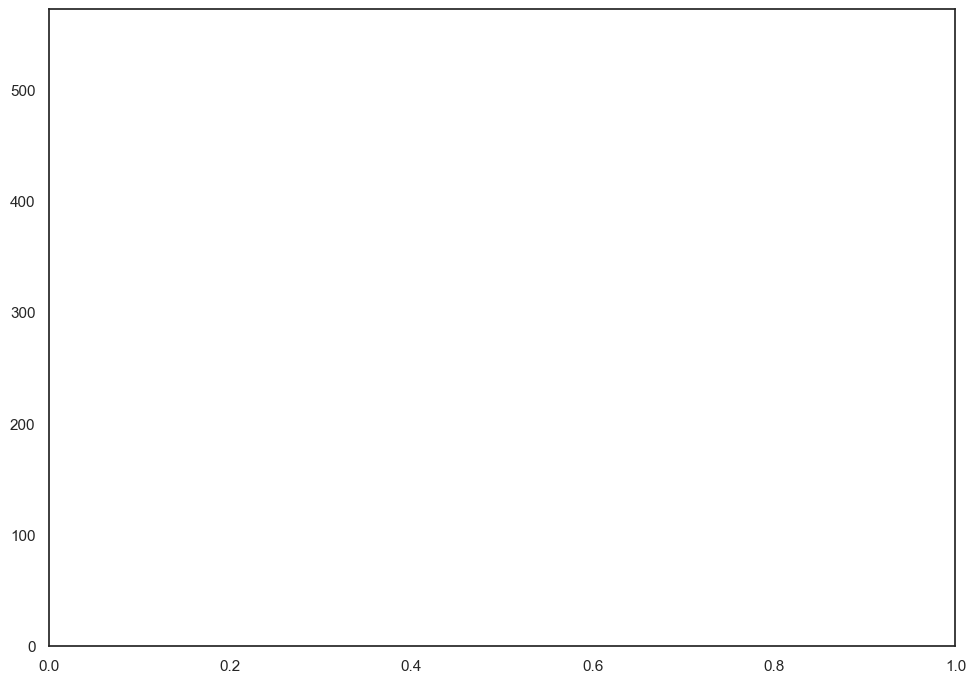

In [1134]:
scatter("Praha","Brno")

In [ ]:
scatter("Prah","Berl")

In [ ]:
def vyvoj(odkud, kam):
    dfp = df[(df['odkud'].str.contains(odkud)) & (df['kam'].str.contains(kam))]
    nejkratsi = dfp['jizdni_doba'].min() * 1.05
    print(f"Nejkratší jízdní doba * 1.05 = {int(nejkratsi)} minut. V datech je {len(dfp[dfp['jizdni_doba'] <= nejkratsi])} takových záznamů.")
    dfp = dfp[dfp['jizdni_doba'] <= nejkratsi]
    return dfp[dfp['cena'] > 0].groupby('predstih_d')['cena'].min()

In [ ]:
def info(odkud, kam):
    dfp = df[(df['odkud'].str.contains(odkud)) & (df['kam'].str.contains(kam))]
    slovnik = {}
    slovnik['zaznamu'] = len(dfp)
    slovnik['unikatnich_spojeni'] = len(dfp.drop_duplicates(subset=['odjezd']))
    slovnik['nejrychlejsi'] = dfp['jizdni_doba'].min()
    slovnik['nejmene_prestupu'] = dfp['prestupy'].min()
    slovnik['nejlevnejsi'] = dfp['cena'].min()
    slovnik['nejlevnejsi_primy'] = dfp[dfp['prestupy'] == 0]['cena'].min()
    slovnik['nejlevnejsi_tyz_den'] = dfp[(dfp['predstih_d'] <= 0) & (dfp['cena'].notnull())]['cena'].min()
    slovnik['nejdrazsi'] = dfp['cena'].max()
    slovnik['rozdil'] = dfp['cena'].max() / dfp['cena'].min()
    return slovnik

In [ ]:
def nejlevnejsi_denni(odkud, kam):
    dfp = df[(df['odkud'].str.contains(odkud)) & (df['kam'].str.contains(kam))]
    return dfp.groupby('predstih_d')['cena'].min().reindex(range(0,90))

In [ ]:
nejlevnejsi_denni('Praha','Wars').plot.bar(figsize=(25,5))

In [ ]:
nejlevnejsi_denni('Úst','Dres').plot.bar(figsize=(25,5))

In [ ]:
nejlevnejsi_denni('Ostr','Gda').plot.bar(figsize=(25,5))

In [ ]:
info('Praha','Brno')

In [ ]:
info('Praha','Zagreb')

In [ ]:
info('Ostrava','Gda')

In [1184]:
info('Olomouc','Prz')

{'zaznamu': 10005,
 'unikatnich_spojeni': 606,
 'nejrychlejsi': 371,
 'nejmene_prestupu': 0,
 'nejlevnejsi': 435.0,
 'nejlevnejsi_primy': 435.0,
 'nejlevnejsi_tyz_den': 800.0,
 'nejdrazsi': 1484.0,
 'rozdil': 3.4114942528735632}

In [ ]:
info("Praha","Amste")

In [ ]:
info("Praha","Wars")

In [ ]:
info("Karlovy V","Ostra")

In [ ]:
info("Pardubice","Košice")

In [ ]:
vyvoj('Praha','Brno')

In [ ]:
nejlevnejsi_denni('Prah','Bern').plot.bar(figsize=(25,5))

In [ ]:
vyvoj('Praha','Wars').reindex(range(0,60)).plot.bar(figsize=(25,5))

In [ ]:
vyvoj('Ostrava','Gda').reindex(range(0,60)).plot.bar(figsize=(25,5))

In [ ]:
vyvoj('Praha','Buda').reindex(range(0,60)).plot.bar(figsize=(25,5))

In [ ]:
df[(df['odkud'].str.contains('Karlov')) & (df['kam'].str.contains('Ostrav'))]

In [ ]:
df[(df['odkud'].str.contains('Karlov')) & (df['kam'].str.contains('Ostrav'))].groupby('cena').size()

In [ ]:
df[(df['odkud'].str.contains('Znojmo')) & (df['kam'].str.contains('Jihlava'))].groupby('cena').size()

In [ ]:
df[(df['odkud'].str.contains('Praha')) & (df['kam'].str.contains('Zagr'))].groupby('cena').size()

In [ ]:
df[(df['odkud'].str.contains('Budějovice')) & (df['kam'].str.contains('Zürich'))].groupby('cena').size()

In [ ]:
df[(df['odkud'].str.contains('Praha')) & (df['kam'].str.contains('Zagr'))].groupby('cena').size()

In [ ]:
df[(df['odkud'].str.contains('Brno')) & (df['kam'].str.contains('Ljubljana')) & (df['prestupy'] == 1)].groupby('cena').size()

In [ ]:
df[(df['odkud'].str.contains('Praha')) & (df['kam'].str.contains('Wars')) & (df['prestupy'] == 0)].groupby('cena').size()

In [ ]:
df[(df['odkud'].str.contains('Praha')) & (df['kam'].str.contains('Brux'))].groupby('cena').size()

In [ ]:
df[(df['odkud'].str.contains('Brno')) & (df['kam'].str.contains('Praha')) & (df['prestupy'] == 0)].groupby('cena').size()

In [ ]:
df[(df['odkud'].str.contains('Liberec')) & (df['kam'].str.contains('Salzb'))].groupby('predstih_d')['cena'].min()

In [ ]:
df[(df['odkud'].str.contains('Brno')) & (df['kam'].str.contains('Hamburg')) & (df['jizdni_doba'] < 700)].groupby('predstih_d')['cena'].median()

In [ ]:
df.sort_values(by='cena',ascending=False)

In [ ]:
df[df['kam'] == 'Hamburg Hbf'].groupby('cena').size()

In [ ]:
zp = df.explode('zpozdeni')
zp[zp['zpozdeni'] > 1]

In [ ]:
df.groupby(['odkud','kam'])['cena'].min()